## Sobre o desafio

Você é o administrador de uma fazenda que depende da irrigação para garantir a produtividade das culturas. Recentemente, você começou a registrar os dados de irrigação em um arquivo CSV, que contém informações sobre as horas de irrigação e a área irrigada correspondente por ângulo.

Seu objetivo é analisar esses dados para entender a relação entre o tempo de irrigação e a área efetivamente irrigada, permitindo otimizar os recursos hídricos da fazenda. Para isso, você decidiu utilizar um modelo de regressão linear para prever a área irrigada com base nas horas de irrigação.

**Tarefa:**

1. **Carregar e Visualizar os Dados:**
    - Carregue os dados de irrigação a partir de um arquivo CSV.
    - Visualize os dados para entender a estrutura e as variáveis disponíveis.
2. **Análise Exploratória dos Dados (EDA):**
    - Calcule as estatísticas descritivas das variáveis.
    - Crie gráficos de dispersão para visualizar a relação entre as horas de irrigação e a área irrigada por ângulo.
    - Analise a correlação entre as variáveis.
3. **Construção do Modelo de Regressão Linear:**
    - Divida os dados em conjuntos de treino e teste.
    - Treine um modelo de regressão linear utilizando as horas de irrigação como variável independente (X) e a área irrigada por ângulo como variável dependente (Y).
    - Imprima a equação da reta obtida pelo modelo.
4. **Avaliação do Modelo:**
    - Utilize as métricas de desempenho (MSE, MAE) para avaliar a precisão do modelo.
    - Visualize os resultados reais e preditos em um gráfico.
5. **Análise de Resíduos:**
    - Calcule e analise os resíduos do modelo.
    - Verifique a normalidade dos resíduos utilizando testes estatísticos e gráficos.
6. **Predições de Exemplo:**
    - Utilize o modelo para fazer predições. Por exemplo, preveja a área irrigada por ângulo para 15 horas de irrigação.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro, kstest, zscore
import statsmodels.api as sm

In [4]:
df_irrigacao = pd.read_csv('./datasets/dados_de_irrigacao.csv')

## EDA

       Horas de Irrigação  Área Irrigada  Área Irrigada por Ângulo
count          299.000000     299.000000                299.000000
mean           150.000000   15000.000000              10000.000000
std             86.458082    8645.808233               5763.872155
min              1.000000     100.000000                 66.666667
25%             75.500000    7550.000000               5033.333333
50%            150.000000   15000.000000              10000.000000
75%            224.500000   22450.000000              14966.666667
max            299.000000   29900.000000              19933.333333


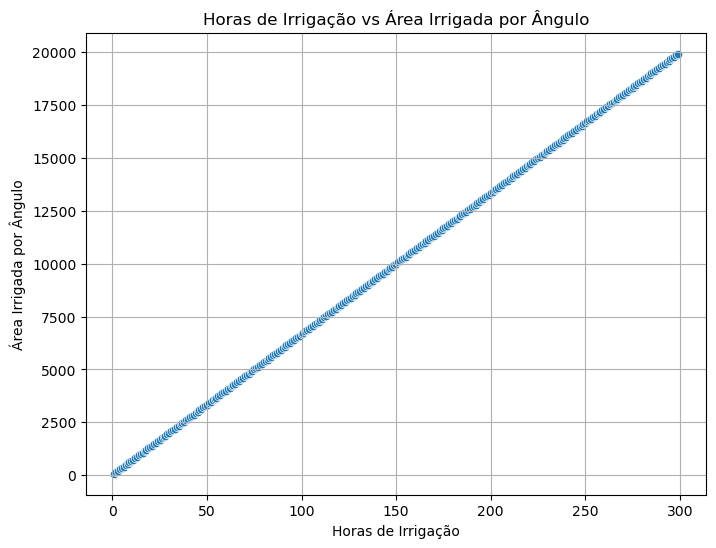

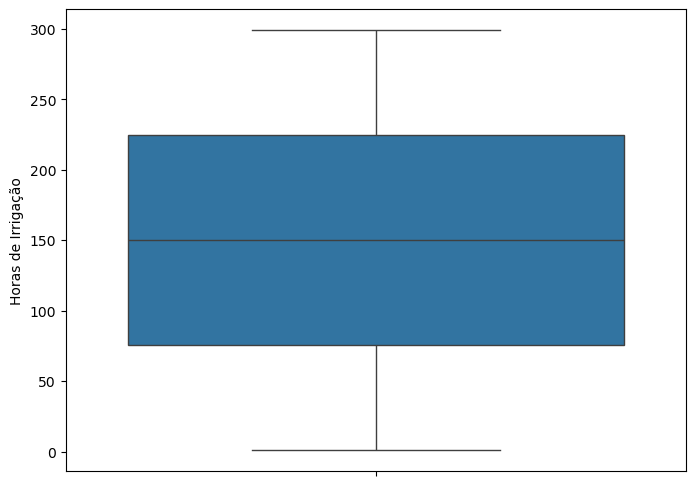

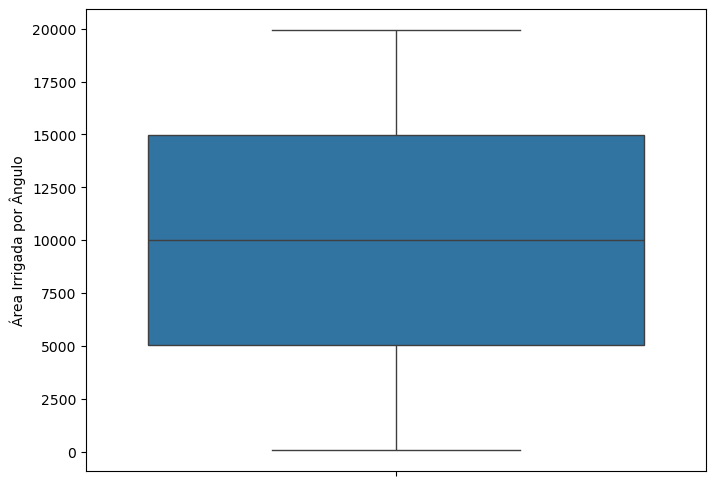

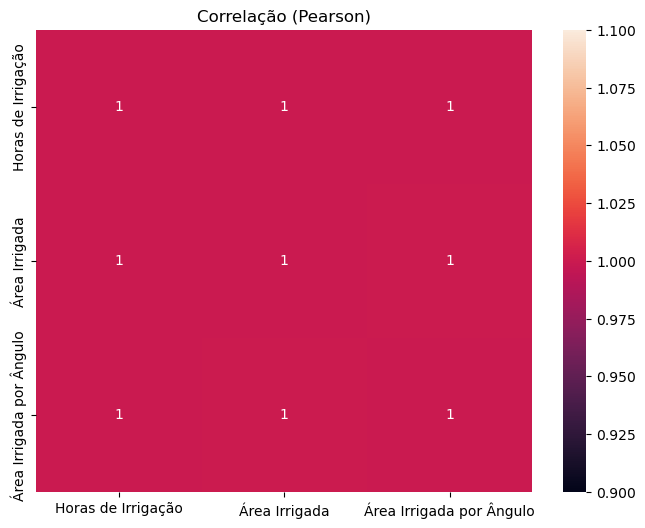

In [8]:
# Estatísticas descritivas
print(df_irrigacao.describe())

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_irrigacao, x='Horas de Irrigação', y='Área Irrigada por Ângulo')
plt.title('Horas de Irrigação vs Área Irrigada por Ângulo')
plt.xlabel('Horas de Irrigação')
plt.ylabel('Área Irrigada por Ângulo')
plt.grid(True)
plt.show()

# Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_irrigacao, y='Horas de Irrigação')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_irrigacao, y='Área Irrigada por Ângulo')
plt.show()

# Correlações
plt.figure(figsize=(8, 6))
sns.heatmap(df_irrigacao.corr(method='pearson'), annot=True)
plt.title('Correlação (Pearson)')
plt.show()

## Treinamento do Modelo

In [9]:
# Divisão dos dados em treino e teste
X = df_irrigacao['Horas de Irrigação'].values.reshape(-1, 1)
y = df_irrigacao['Área Irrigada por Ângulo'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Imprimir a equação da reta
coeficiente = reg_model.coef_[0][0]
intercepto = reg_model.intercept_[0]
print(f"A equação da reta é: y = {coeficiente}x + {intercepto}")

A equação da reta é: y = 66.66666666666667x + 1.8189894035458565e-12


## Validação do Modelo

MSE: 8.248757082420076e-24
MAE: 2.559848629365054e-12


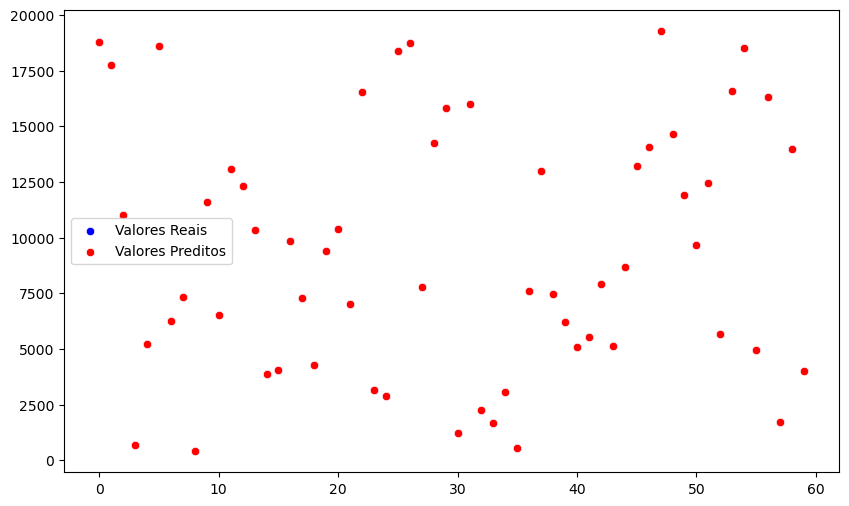

In [10]:
# Predição dos valores
y_pred = reg_model.predict(X_test)

# Métricas de desempenho
mse = np.mean((y_test - y_pred)**2)
mae = np.mean(np.abs(y_test - y_pred))
print(f"MSE: {mse}")
print(f"MAE: {mae}")

# Análise gráfica
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(y_test)), y=y_test.flatten(), color='blue', label='Valores Reais')
sns.scatterplot(x=range(len(y_test)), y=y_pred.flatten(), color='red', label='Valores Preditos')
plt.legend()
plt.show()

Insights sobre a Análise
Relação Linear: A relação entre as horas de irrigação e a área irrigada por ângulo é linear, como esperado. A equação da reta obtida reflete essa relação direta.

Desempenho do Modelo: As métricas de erro (MSE e MAE) indicam que o modelo de regressão linear é adequado para prever a área irrigada por ângulo com base nas horas de irrigação.

Análise de Resíduos: A análise de resíduos mostra que os resíduos são aproximadamente normais, indicando que as suposições do modelo de regressão linear são válidas.

Previsões: O modelo pode ser usado para fazer previsões sobre a área irrigada por ângulo dada uma quantidade específica de horas de irrigação.

## Predição de Exemplo

In [11]:
# Predição de exemplo
horas_exemplo = np.array([[45]])
area_predita = reg_model.predict(horas_exemplo)
print(f"Para 45 horas de irrigação, a área irrigada por ângulo prevista é: {area_predita[0][0]}")

Para 45 horas de irrigação, a área irrigada por ângulo prevista é: 3000.000000000002
